(sec:fourierove_vrste)=
# 2. Fourierove vrste

Cilj Fourierovih vrst je, da bi poljuben (periodičen) signal opisali z vsoto harmonskih signalov različnih osnovnih period. V tem poglavju se bomo omejili na matematično definirane signale in sicer v sledečih korakih:

1. korak: zapis periodičnega signala, kot vsote harmonskih signalov,
1. korak: identifikacija harmonskih signalov iz točke 1,
1. korak: posplošitev.


Kot morebitne dodatne vire, lahko tukaj priporočamo {cite:t}`shin2008` in [Grant Sanderson: But what is a Fourier series? From heat flow to drawing with circles]( https://www.youtube.com/watch?v=r6sGWTCMz2k).


## Zapis periodičnega signala, kot vsote harmonskih signalov

Preden gremo v podrobnosti Fourierovih vrst, si poglejmo definicijo splošnega harmonskega signala:

$$
x(t) = A\,\sin(\omega\,t+\varphi),
$$

kjer je $A$ amplituda, $\omega$ krožna frekvenca (enota: rad/s) in $\varphi$ fazni kot (enota rad) glede na izhodišče časa. Pri tem je $\omega=2\,\pi\,f$ in je $f$ (sekundna) frekvenca (enota: 1/s=Hz). Pozitivna faza pomakne harmonsko funkcijo proti levi, negativna faza pa proti desni. Perioda $T$ je definirana s krožno frekvenco: $T=2\,\pi/\omega$.

Primer harmonskega signala z amplitudo $A=1$, krožno frekvenco $\omega=1\,$rad/s in pozitivno fazo $\varphi=1\,$rad je prikazan spodaj.

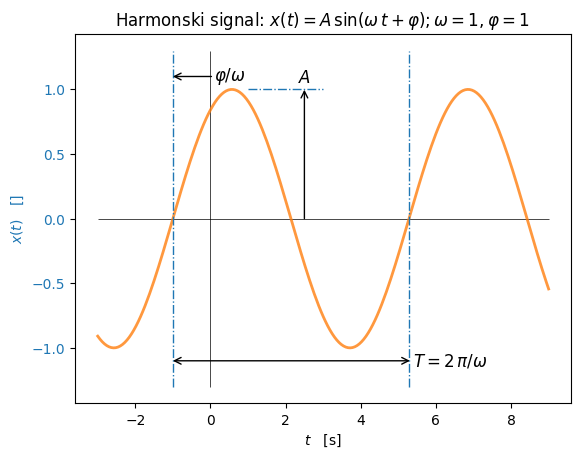

In [5]:
import numpy as np
import matplotlib.pyplot as plt


T = 6
A = 1
t, dt = np.linspace(-0.5*T,1.5*T,201, retstep=True)
ω = 1
ϕ = 1

fig, ax1 = plt.subplots()
plt.title(f'Harmonski signal: $x(t) = A\\,\\sin(\\omega\\,t+\\varphi); \\omega={ω}, \\varphi={ϕ}$ ')

ax1.set_xlabel('$t\\quad $[s]')
ax1.set_ylabel('$x(t)\\quad$[]', color='C0')
ax1.tick_params(axis='y', labelcolor='C0')
ax1.vlines(0, -1.3, 1.3, 'k', lw=0.5)
ax1.hlines(0, np.min(t), np.max(t), 'k', lw=0.5)
ax1.plot(t, A*np.sin(ω*t+ϕ), label='Harmonski signal', c='C1', lw=2, alpha=0.8) 
ax1.vlines(-ϕ+2*np.pi*np.arange(T/(ω*2*np.pi)+1), -1.3, 1.3, ls='-.', lw=1)
ax1.annotate('$\\varphi/\\omega$',
            xy=(-ϕ, 1.1), xycoords='data',
            va='center', size='large',
            xytext=(0.1, 1.1), textcoords='data',
            arrowprops=dict(arrowstyle='->',
                            connectionstyle='arc3,rad=0',
                            color="k", shrinkA=0, shrinkB=0),
            )
ax1.hlines(A, 1., 3, ls='-.', lw=1)
ax1.annotate('$A$',
            xy=(2.5, 0), xycoords='data',
            ha='center', size='large',
            xytext=(2.5, A+.05), textcoords='data',
            arrowprops=dict(arrowstyle='<-',
                            connectionstyle='arc3,rad=0',
                            color="k", shrinkA=0, shrinkB=0),
            )
ax1.annotate('$T=2\\,\\pi/\\omega$',
            xy=(-ϕ, -1.1), xycoords='data',
            va='center', size='large', 
            xytext=(2*np.pi-ϕ+0.1, -1.1), textcoords='data',
            arrowprops=dict(arrowstyle='<->',
                            connectionstyle='arc3,rad=0',
                            color="k", shrinkA=0, shrinkB=0),
            )
plt.show()

Nadaljujmo sedaj z vsoto harmonskih signalov, pri tem se bomo omejili na kompleksno periodične signale (glejte {ref}`sec:klasifikacija_pod`), kjer je razmerje med frekvencami posameznih harmonikov racionalno število. Frekvence harmonskih signalov bomo dodatno omejili: če je osnovna krožna frekvenca $\omega_p=2\,\pi/T_p$ definirana z osnovno periodo $T_p$, potem bomo za vse ostale harmonike zahtevali, da imajo krožno frekvenco, ki je večkratnik osnovne krožne frekvence.

Opisu ustreza vsota harmonskih signalov:

$$
x(t)=\frac{a_0}{2}+\sum_{n=1}^{\infty}
\left[
a_n\cos\left(\frac{2\,\pi\,n\,t}{T_p} \right)
+
b_n\sin\left(\frac{2\,\pi\,n\,t}{T_p} \right)
\right],
$$

kjer je $a_0$ konstanta, $a_n$ amplituda $n$-te cosinusne komponente in $b_n$ amplituda $n$-te sinusne komponente.

Spodaj si poglejmo primer harmonskega signala, ki ustreza omejitvam kompleksno periodičnega signala.

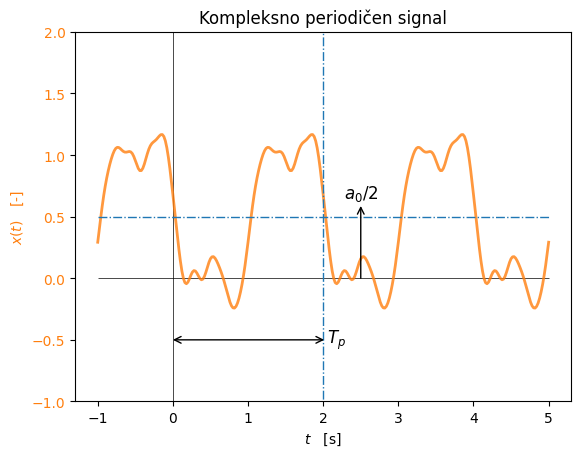

In [7]:
import numpy as np
import matplotlib.pyplot as plt


Tp = 2
t, dt = np.linspace(-0.5*Tp,2.5*Tp,301, retstep=True)
a0 = 1.
N = 10
seed = 0
rg = np.random.default_rng(seed)
a = rg.normal(size=N)*1/np.arange(1,N+1)**2 #skaliranje na koncu, da imajo višje komponente imajo manjšo amplitudo
b = rg.normal(size=N)*1/np.arange(1,N+1)**2
x = a0/2
for n in range(N):
    x += a[n]*np.cos(2*np.pi*(n+1)*t/Tp) + b[n]*np.sin(2*np.pi*(n+1)*t/Tp)

fig, ax1 = plt.subplots()
plt.title(f'Kompleksno periodičen signal')

ax1.set_xlabel('$t\\quad $[s]')
ax1.set_ylabel('$x(t)\\quad$[-]', color='C1')
ax1.tick_params(axis='y', labelcolor='C1')
ax1.vlines(0, -2, 2, 'k', lw=0.5)
ax1.hlines(0, np.min(t), np.max(t), 'k', lw=0.5)
ax1.plot(t, x, c='C1', lw=2, alpha=0.8) 
ax1.vlines([Tp], -2, 2, ls='-.', lw=1)
ax1.hlines(a0/2, np.min(t), np.max(t), ls='-.', lw=1)
ax1.annotate('$a_0/2$',
            xy=(2.5, 0), xycoords='data',
            ha='center', size='large',
            xytext=(2.5, a0/2+.15), textcoords='data',
            arrowprops=dict(arrowstyle='<-',
                            connectionstyle='arc3,rad=0',
                            color="k", shrinkA=0, shrinkB=0),
            )
ax1.annotate('$T_{p}$',
            xy=(0, -0.5), xycoords='data',
            va='center', size='large', 
            xytext=(Tp+0.05, -0.5), textcoords='data',
            arrowprops=dict(arrowstyle='<->',
                            connectionstyle='arc3,rad=0',
                            color="k", shrinkA=0, shrinkB=0),
            )
plt.ylim(-1,2)
plt.show()

Periodičen signal, kakor smo si jo pogledali zgoraj, je ključnega pomena za razumevanje Fourierovih vrst (in pozneje Fourierove transformacije, glejte {ref}`sec:fourierova_int_transf`). V nadaljevanju bomo periodičen signal najprej preoblikovali v kompleksno obliko, saj nam bo to zelo poenostavilo matematični zapis in fizikalno jasnost.

Zapis v kompleksno obliko začnemo s pomočjo Eulerjeve formule:

$$
\mathrm{e}^{\pm \mathrm{i}\,\alpha} = \cos\alpha \pm  \mathrm{i}\,\sin\alpha,
$$

kjer je $\mathrm{i}=\sqrt{-1}$. 

Če uporabimo $\alpha=2\,\pi\,n\,t/T_p$, lahko zapišemo:

$$
\cos\alpha=\frac{1}{2}\mathrm{e}^{\mathrm{i}\,\alpha}+\frac{1}{2}\mathrm{e}^{-\mathrm{i}\,\alpha}
\qquad
\sin\alpha=-\frac{1}{2}\,\mathrm{i}\,\mathrm{e}^{\mathrm{i}\,\alpha}+\frac{1}{2}\,\mathrm{i}\,\mathrm{e}^{-\mathrm{i}\,\alpha}
$$

ter funkcijo:

$$
x(t)=\frac{a_0}{2}+\sum_{n=1}^{\infty}
\left[
a_n\cos\big(\frac{2\,\pi\,n\,t}{T_p} \big)
+
b_n\sin\big(\frac{2\,\pi\,n\,t}{T_p} \big)
\right]
$$

preoblikujemo v:

$$
x(t)=\frac{a_0}{2}+\sum_{n=1}^{\infty}
\left[
a_n\big( 
\frac{1}{2}\mathrm{e}^{\mathrm{i}\,\alpha}+\frac{1}{2}\mathrm{e}^{-\mathrm{i}\,\alpha}
\big)+
b_n\big( 
-\frac{1}{2}\,\mathrm{i}\,\mathrm{e}^{\mathrm{i}\,\alpha}+\frac{1}{2}\,\mathrm{i}\,\mathrm{e}^{-\mathrm{i}\,\alpha}
\big)
\right].
$$

Urejamo naprej:

$$
x(t)=\frac{a_0}{2}+\sum_{n=1}^{\infty}
\left[
\big( 
\frac{1}{2}a_n-\frac{1}{2}\mathrm{i}b_n
\big)\,\mathrm{e}^{\mathrm{i}\,2\,\pi\,n\,t/T_p}
\right]
+\sum_{n=1}^{\infty}
\left[
\big( 
\frac{1}{2}a_n+\frac{1}{2}\mathrm{i}b_n
\big)\,\mathrm{e}^{-\mathrm{i}\,2\,\pi\,n\,t/T_p}
\right].
$$

Zgornji izraz poenostavimo v:

$$
x(t)=\sum_{n=-\infty}^{\infty}
c_n\,\mathrm{e}^{\mathrm{i}\,2\pi\,n\,t/T_p},
$$

kjer velja:

$$
c_n = 
\begin{cases}
    \frac{1}{2}a_n-\frac{1}{2}\textrm{i}b_n,& \text{če } n\geq +1\\
    \frac{1}{2}a_n,              & \text{če } n = 0\\
    \frac{1}{2}a_{|n|}+\frac{1}{2}\textrm{i}b_{|n|},& \text{če } n\leq -1\\
\end{cases}
$$

Ugotovimo, da velja $c_n=c_{-n}^{*}$, kjer smo z ${}^*$ označili kompleksno konjugirano vrednost.

:::{note}
Zapis kompleksno periodičnega signala s Fourierovo vrsto z realnimi koeficienti:

$$
x(t)=\frac{a_0}{2}+\sum_{n=1}^{\infty}
\left[
a_n\cos\left(\frac{2\,\pi\,n\,t}{T_p} \right)
+
b_n\sin\left(\frac{2\,\pi\,n\,t}{T_p} \right)
\right]
$$

:::

:::{note}
Zapis kompleksno periodičnega signala s Fourierovo vrsto s kompleksnimi koeficienti:

$$
x(t)=\sum_{n=-\infty}^{\infty}
c_n\,\mathrm{e}^{\mathrm{i}\,2\pi\,n\,t/T_p},
$$

:::

Oba zapisa zgoraj seveda vodita v isti rezultat (glejte primer spodaj).

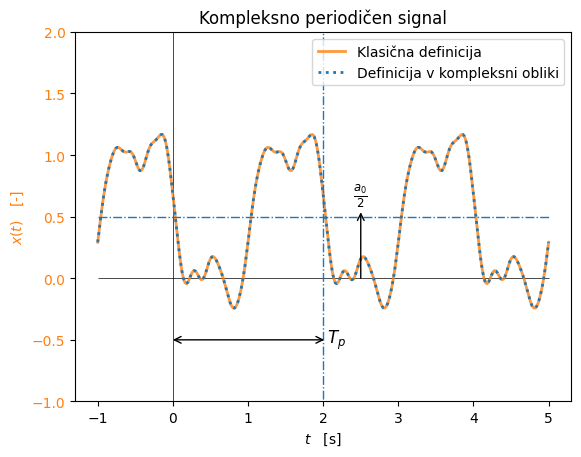

In [9]:
import numpy as np
import matplotlib.pyplot as plt


Tp = 2
t, dt = np.linspace(-0.5*Tp,2.5*Tp,301, retstep=True)
a0 = 1.
N = 10
seed = 0
rg = np.random.default_rng(seed)
a = rg.normal(size=N)*1/np.arange(1,N+1)**2 #skaliranje na koncu, da imajo višje komponente imajo manjšo amplitudo
b = rg.normal(size=N)*1/np.arange(1,N+1)**2

c = np.zeros(2*N+1, dtype='complex')
c[N+1:] = 0.5*a-0.5j*b
c[N] = a0/2
c[:N] = np.conj(c[N+1:])[::-1]

x1 = a0/2
for n in range(N):
    x1 += a[n]*np.cos(2*np.pi*(n+1)*t/Tp) + b[n]*np.sin(2*np.pi*(n+1)*t/Tp)

x = np.zeros(len(t), 'complex')
for n in range(-N,N+1):
    x += c[N+n]*np.exp(2j*np.pi*n*t/Tp)
x = np.real(x) # teoretično pričakujemo samo realno rezultat (imaginarni del mora biti na nivoju numerične napake)
    
fig, ax1 = plt.subplots()
plt.title(f'Kompleksno periodičen signal')

ax1.set_xlabel('$t\\quad $[s]')
ax1.set_ylabel('$x(t)\\quad$[-]', color='C1')
ax1.tick_params(axis='y', labelcolor='C1')
ax1.vlines(0, -2, 2, 'k', lw=0.5)
ax1.hlines(0, np.min(t), np.max(t), 'k', lw=0.5)
ax1.plot(t, x1, label='Klasična definicija', c='C1', lw=2, alpha=0.8) 
ax1.plot(t, x, label='Definicija v kompleksni obliki', c='C0', ls=':', lw=2, alpha=1) 
ax1.vlines([Tp], -2, 2, ls='-.', lw=1)
ax1.hlines(a0/2, np.min(t), np.max(t), ls='-.', lw=1)
ax1.annotate('$\\frac{a_0}{2}$',
            xy=(2.5, 0), xycoords='data',
            ha='center', size='large',
            xytext=(2.5, a0/2+.13), textcoords='data',
            arrowprops=dict(arrowstyle='<-',
                            connectionstyle='arc3,rad=0',
                            color="k", shrinkA=0, shrinkB=0),
            )
ax1.annotate('$T_{p}$',
            xy=(0, -0.5), xycoords='data',
            va='center', size='large', 
            xytext=(Tp+0.05, -0.5), textcoords='data',
            arrowprops=dict(arrowstyle='<->',
                            connectionstyle='arc3,rad=0',
                            color="k", shrinkA=0, shrinkB=0),
            )
ax1.legend(loc=1)
plt.ylim(-1,2)
plt.show()

(sec:identifikacija_harmonskih_signalov)=

## Identifikacija harmonskih signalov, ki sestavljajo periodični signal

Sedaj se lahko vrnemo na izvorno nalogo Fourierovih vrst: **popis poljubnega periodičnega signala s superpozicijo različnih harmonskih signalov**. 

Odgovoriti moramo na vprašanje: ali v periodičnem signalu:

$$
x(t)=\sum_{n=-\infty}^{\infty}
c_n\,\mathrm{e}^{\mathrm{i}\,2\pi\,n\,t/T_p},\qquad c_n=c_{-n}^*
$$

lahko identificiramo harmonski sitnal s frekvenco $m$-kratnika osnovne frekvence, torej  $c_m\,\mathrm{e}^{\mathrm{i}\,2\pi\,m\,t/T_p}$? 

Izkaže se, da je to relativno enostavno; pokaz začnemo z integralom periodične funkcije $x(t)$ pomnožene z enotsko harmonsko funkcijo  $\mathrm{e}^{-\mathrm{i}\,2\pi\,m\,t/T_p}$, ki ima negativno frekvenco $-m/T_p$ (namesto $\textrm{i}$, imamo v eksponentu $\textrm{-i}$):

$$
\underbrace{\int_0^{T_p} x(t)\,\mathrm{e}^{-\mathrm{i}\,2\pi\,m\,t/T_p}\,\mathrm{d}t}_{A_m}=
\underbrace{\int_0^{T_p} \sum_{n=-\infty}^{\infty}
c_n\,\mathrm{e}^{\mathrm{i}\,2\pi\,n\,t/T_p} \,\,\mathrm{e}^{-\mathrm{i}\,2\pi\,m\,t/T_p}\,\mathrm{d}t}_{B_m}
$$

Ker $x(t)$ predstavlja znani periodični signal, lahko integral $A_m$ izračunamo. $B_m$ pa lahko poenostavimo v:

$$
B_m=\int_0^{T_p} \sum_{n=-\infty}^{\infty}
c_n\,\mathrm{e}^{\mathrm{i}\,2\pi\,(n-m)\,t/T_p} \,\mathrm{d}t
$$

Zamenjajmo sedaj vrstni red seštevanja in integriranja, ter izpostavimo konstanto $c_n$:

$$
B_m= \sum_{n=-\infty}^{\infty}
c_n\,\int_0^{T_p}\mathrm{e}^{\mathrm{i}\,2\pi\,(n-m)\,t/T_p} \,\mathrm{d}t
$$

Ker integriramo harmonski signal s frekvenco, ki je celi večkratnik osnovne frekvence $1/T_p$, je rezultat vedno 0, razen takrat, ko je $n=m$:

$$
\int_0^{T_p}\mathrm{e}^{\mathrm{i}\,2\pi\,(n-m)\,t/T_p} \,\mathrm{d}t=
\begin{cases}
    0,& \text{če } n\ne m\\
    T_p,& \text{če } n= m\\
\end{cases}
$$

Sledi torej:

$$
B_m = c_m\,T_p
$$

Ker velja $A_m=B_m$ sledi, da je neznani Fourierov koeficient $c_m$ definiran kot (gre za kompleksno število z amplitudo in fazo):

$$
c_m = \frac{A_m}{T_p} = \frac{1}{T_p}\,\int_0^{T_p} x(t)\,\mathrm{e}^{-\mathrm{i}\,2\pi\,m\,t/T_p}\,\mathrm{d}t
$$

Izpeljali smo torej, da je posamezno harmonsko komponento relativno enostavno določiti; v praksi se pojavi težava, da dani podatki $x(t)$ ne izpolnjujejo vseh predpostavk, predvsem ne tiste, da je harmonik celi večkratnik osnovne frekvence; s temi težavami se bomo soočili v poglavju {ref}`sec:okna`.

## Posplošitev

Fourierove vrste najpogosteje najdemo definirane v treh oblikah ($T_p$ predstavlja osnovno period in $N$ število harmonskih komponent, ki jih upoštevamo/identificiramo):

(sec:FV_exp)=

### Fourierove vrste v eksponentni (kompleksni) obliki

:::{note}
Fourierovi koeficienti:

$$
c_n = \frac{1}{T_p}\,\int_0^{T_p} x(t)\,\mathrm{e}^{-\mathrm{i}\,2\pi\,n\,t/T_p}\,\mathrm{d}t
$$

$$
x(t)=\sum_{n=-N}^{N}
c_n\,\mathrm{e}^{\mathrm{i}\,2\pi\,n\,t/T_p},\qquad c_n=c_{-n}^*
$$

:::

(sec:FV_sin_cos)=

### Fourierove vrste v sinus-cosinusni obliki

:::{note}

Fourierovi koeficienti:

$$
a_n = \frac{1}{T_p}\,\int_0^{T_p} x(t)\,\cos(2\pi\,n\,t/T_p)\,\mathrm{d}t
$$

$$
b_n = \frac{1}{T_p}\,\int_0^{T_p} x(t)\,\sin(2\pi\,n\,t/T_p)\,\mathrm{d}t
$$

Rekonstruirana zvezna funkcija:

$$
x(t)=\frac{a_0}{2}+\sum_{n=1}^{N}
a_n\,\cos(2\pi\,n\,t/T_p)+
b_n\,\sin(2\pi\,n\,t/T_p)
$$

:::

### Fourierove vrste v amplitudno-fazni obliki

:::{note}

Rekonstruirana zvezna funkcija:

$$
x(t)=\frac{A_0}{2}+\sum_{n=1}^{N}
A_n\,\cos(2\pi\,n\,t/T_p-\varphi_n)
$$

:::

Kjer moramo amplitudo $A_n$ in fazo $\varphi_n$ določiti s pomočjo eksponentne ali sinusno-cosinusne oblike in ob pomoči prehodov med posameznimi oblikami zapisov:

$$
\begin{split}
c_0&=A_0=a_0\\
c_n&=\frac{A_n}{2}\,\mathrm{e}^{-\mathrm{i}\varphi_n}&=\frac{1}{2}(a_n-\mathrm{i}b_n)\\
c_n&=c_{-n}^*&\\
\end{split}
$$

V tej knjigi bomo skoraj izključno uporabljali eksponentno obliko, saj je najbolj kompaktna ter enostavna za uporabo v matematičnih  izpeljavah. 

## Nekatere lastnosti Fourierovih vrst

#### Odvodi in integrali Fourierovih vrst

:::{note}

Fourierove vrste $x(t)$ konvergirajo k danemu periodičnemu signalu $f(t)$, če so izpolnjeni trije **Dirichletovi pogoji**:

* signal je absolutno integrabilen: $\int_0^{T_p}|f(x)|\mathrm{d}t$,
* signal ima na območju $[0, T_p]$ končno število ekstremov,
* signal ima na območju $[0, T_p]$ končno število nezveznosti.

:::

Če signal izpolnjuje Dirichletove pogoje, Fourierova vrsta konvergira k signalu na vseh točkah območja, vključno s točkami nezveznosti. To je zelo pomemben rezultat v Fourierovi analizi, saj nam omogoča, da vsak periodičen signal predstavimo kot vsoto sinusnih in kosinusnih členov.

Če Dirichletov pogoj izpolnjuje tudi odvod $\dot f(t)$, potem je mogoče odvod izračunati neposredno iz Fourierovih vrst za $x(t)$, pri čemer je treba odvajati posamezne člene.

$$
\dot{x}(t)=\sum_{n=-N}^{N}
\frac{\mathrm{i}\,2\pi\,n}{T_p}\,c_n\,\mathrm{e}^{\mathrm{i}\,2\pi\,n\,t/T_p},\qquad c_n=c_{-n}^*
$$

Analogno velja za integracijo: 

$$
x(t)=\sum_{n=-N}^{N}
\frac{T_p}{\mathrm{i}\,2\pi\,n}\,\dot{c}_n\,\mathrm{e}^{\mathrm{i}\,2\pi\,n\,t/T_p},\qquad \dot{c}_n=\dot{c}_{-n}^*,
$$

kjer so $\dot{c}_n$ konstante Fourierove vrste za $\dot{x}(t)$. Za primer, glejte zglede v nadaljevanju.

(sec:FV_lih_sod)=

#### Fourierove vrste lihih in sodih funkcij

Funkcija $x(t)$ je **soda**, če velja:

$$
x(-t)=x(t),
$$

takrat velja tudi:

$$
\int_{-a}^{+a} x(t)\,\mathrm{d}t=2\,\int_0^a x(t)\,\mathrm{d}t.
$$

Funkcija je **liha**, če velja:

$$
x(-t)=-x(t),
$$

takrat velja tudi

$$
\int_{-a}^{+a} x(t)\,\mathrm{d}t=0.
$$

Izpostavimo lahko, da je funkcija $\cos()$ soda, funkcija $\sin()$ pa liha. 

Za poznejšo obravnavo je pomembna sodost/lihost produkta  funkcij $x(t)\,y(t)$. Sodost oz. lihost je odvisna od sodosti oz. lihosti funkcij $x(t)$ in $y(t)$. 

Odnosi so definirani v tabeli spodaj.

| če $x(t)$ | če $y(t)$ | je rezultat $x(t)\,y(t)$|
|:-|-:|:-:|
| liha  | liha  | *soda*  |
| liha  | soda  | *liha*  |
| soda  | liha  | *liha*  |
| soda  | soda  | *soda*  |

Glede na zgornjo tabelo lahko sklenemo (glejte tudi {ref}`sec:FV_sin_cos`):

:::{note}

* če iščemo Fourierovo vrsto *sode* periodične funkcije $x(t)$, potem bodo sinusni členi $b_n$ enaki nič (ker je produkt sode in lihe funkcije liha funkcija; integral lihe funkcije pa je 0).
* če iščemo Fourierovo vrsto *lihe* peridične funkcije $x(t)$, potem bodo cosinusni členi $a_n$ enaki nič (ker je produkt lihe in sode funkcije liha funkcija; integral lihe funkcije pa je 0).

:::


## Nekateri zgledi

### Kompleksno periodičen signal 

Najprej si bomo pogledali kompleksno periodičen signal, ki smo ga spoznali in definirali že zgoraj. Signal je definirana z $N=10$ harmonskimi komponentami $c_n$, ki so v spodnjem primeru znane; tukaj bomo pokazali, da nas uporaba zgoraj definiranih enačb vodi v točno identifikacijo le-teh.

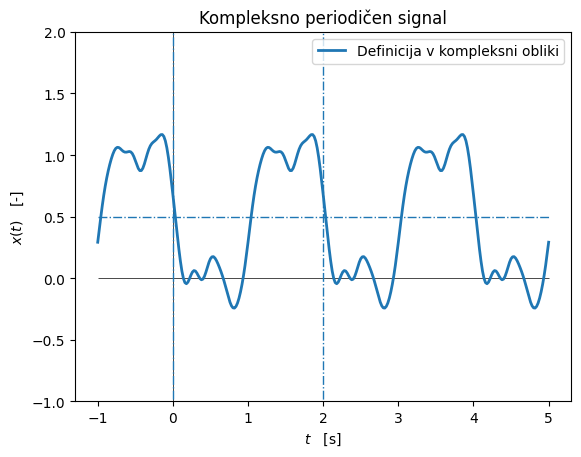

In [11]:
import numpy as np
import matplotlib.pyplot as plt


Tp = 2
t, dt = np.linspace(-0.5*Tp,2.5*Tp,301, retstep=True)
a0 = 1.
N = 10
seed = 0
rg = np.random.default_rng(seed)
a = rg.normal(size=N)*1/np.arange(1,N+1)**2 #skaliranje na koncu, da imajo višje komponente imajo manjšo amplitudo
b = rg.normal(size=N)*1/np.arange(1,N+1)**2

c = np.zeros(2*N+1, dtype='complex')
c[N+1:] = 0.5*a-0.5j*b
c[N] = a0/2
c[:N] = np.conj(c[N+1:])[::-1]

x = np.zeros(len(t), 'complex')
for n in range(-N,N+1):
    x += c[N+n]*np.exp(2j*np.pi*n*t/Tp)
x = np.real(x) # teoretično pričakujemo samo realno rezultat (imaginarni del mora biti na nivoju numerične napake)
    

fig, ax1 = plt.subplots()
plt.title(f'Kompleksno periodičen signal')

ax1.set_xlabel('$t\\quad $[s]')
ax1.set_ylabel('$x(t)\\quad$[-]')
ax1.tick_params(axis='y')
ax1.vlines(0, -2, 2, 'k', lw=0.5)
ax1.hlines(0, np.min(t), np.max(t), 'k', lw=0.5)
ax1.plot(t, x, label='Definicija v kompleksni obliki', c='C0', lw=2, alpha=1) 
ax1.vlines([0, Tp], -2, 2, ls='-.', lw=1)
ax1.hlines(a0/2, np.min(t), np.max(t), ls='-.', lw=1)
ax1.legend(loc=1)
plt.ylim(-1,2)
plt.show()

V primeru zgoraj je peridičen signal generirana na podlagi vektorja Fourierovih koeficientov:

In [12]:
c

array([-0.00632711+0.00521257j, -0.00434404+0.00254093j,
        0.00739907-0.00247109j,  0.01330612-0.00555366j,
        0.00502215-0.01017038j, -0.01071339-0.02491822j,
        0.00327813-0.00683724j,  0.03557904-0.12916838j,
       -0.01651311+0.00516575j,  0.06286511-0.31163723j,
        0.5       +0.j        ,  0.06286511+0.31163723j,
       -0.01651311-0.00516575j,  0.03557904+0.12916838j,
        0.00327813+0.00683724j, -0.01071339+0.02491822j,
        0.00502215+0.01017038j,  0.01330612+0.00555366j,
        0.00739907+0.00247109j, -0.00434404-0.00254093j,
       -0.00632711-0.00521257j])

Opazimo, da je vektor kompleksno konjugiran okoli središčnega elementa. Poljubni element lahko zgolj na podlagi časovne vrste $x(t)$ določimo tako, da sledimo definiciji:

$$
c_n = \frac{1}{T_p}\,\int_0^{T_p} x(t)\,\mathrm{e}^{-\mathrm{i}\,2\pi\,n\,t/T_p}\,\mathrm{d}t
$$

kar je v numerični implementaciji (za `n=1`):

In [13]:
n=1 # poskusite še druge vrednosti, tudi n>N!
sel = np.logical_and(t>=0, t<=Tp)
np.trapz(x[sel]*np.exp(-2j*np.pi*n*t[sel]/Tp), dx=dt)/Tp

(0.06286511054669663+0.3116372312686761j)

Pri tem smo izbrali (`sel`) samo eno periodo v časovni vrsti. Tukaj velja poudariti, da moramo integrirati po celotni periodi. Če je napaka numerične integracije dovolj majhna (kar je primer zgoraj), je rezultat **točen** do nivoja natančnosti zapisa v računalnik.

Vredno je opozoriti, da moramo biti zelo natančni pri implementaciji izpeljanih izrazov. Hitro lahko dobimo *zelo dober* rezultat; vendar dokler ni *točen* do nivoja natančnosti zapisa v računalnik, do takrat je nekje v implementaciji napaka. 

Napako bi lahko naredili, če bi naša diskretizacija bila takšna, da ne bi ključevala točke pri 0s in točke pri $T_p$. Tako napako lahko preiskusite tako, greste par vrstic navzgor v definicijo slike in vrstico:
```python
t, dt = np.linspace(-0.5*Tp,2.5*Tp,301, retstep=True)
```
spremenite v (301 v 300):
```python
t, dt = np.linspace(-0.5*Tp,2.5*Tp,300, retstep=True)
```

### Odvod / Integral kompleksno periodičnega signala

Nadaljujemo z zgledom in poglejmo odvod po času. V kodi spodaj pokažemo, da je Fourierova vrsta odvoda po času res enaka Fourierovi vrsti, kjer smo vsakega od členov Fourierove vrste osnovnih podatkov preprosto odvajali.

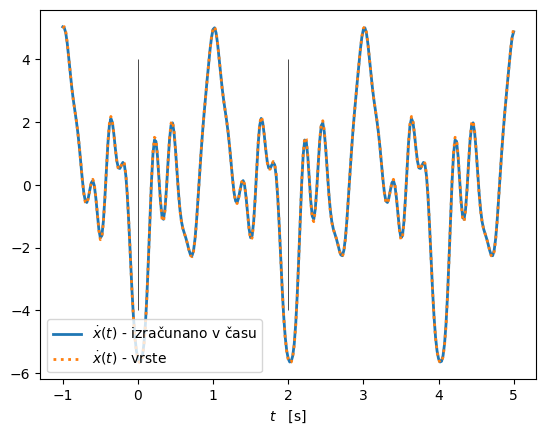

In [15]:
import numpy as np
import matplotlib.pyplot as plt


Tp = 2
t, dt = np.linspace(-0.5*Tp,2.5*Tp,301, retstep=True)
a0 = 1.
N = 10
seed = 0
rg = np.random.default_rng(seed)
a = rg.normal(size=N)*1/np.arange(1,N+1)**2 #skaliranje na koncu, da imajo višje komponente imajo manjšo amplitudo
b = rg.normal(size=N)*1/np.arange(1,N+1)**2

c = np.zeros(2*N+1, dtype='complex')
c[N+1:] = 0.5*a-0.5j*b
c[N] = a0/2
c[:N] = np.conj(c[N+1:])[::-1]

x = np.zeros(len(t), 'complex')
for n in range(-N,N+1):
    x += c[N+n]*np.exp(2j*np.pi*n*t/Tp)
x = np.real(x) # teoretično pričakujemo samo realno rezultat (imaginarni del mora biti na nivoju numerične napake)
x_d_t = np.gradient(x,dt)

x_d_v = np.zeros(len(t), 'complex') # ODVOD Z VRSTAMI
for n in range(-N,N+1):
    x_d_v += c[N+n]*np.exp(2j*np.pi*n*t/Tp)*2j*np.pi*n/Tp
x_d_v = np.real(x_d_v) # teoretično pričakujemo samo realno rezultat (imaginarni del mora biti na nivoju numerične napake)


fig, ax1 = plt.subplots()
ax1.set_xlabel('$t\\quad $[s]')
ax1.vlines([0, Tp], -4, 4, 'k', lw=0.5)
ax1.plot(t, x_d_t, label='$\\dot{x}(t)$ - izračunano v času', c='C0', lw=2, alpha=1) 
ax1.plot(t, x_d_v, label='$\\dot{x}(t)$ - vrste', ls=':', c='C1', lw=2, alpha=1) 
ax1.legend()
plt.show()

Zgornji primer lahko nadaljujemo in izvorni pomik $x(t)$ identificiramo iz Fourierovih vrst za hitrost $\dot x(t)$, glejte kodo in sliko spodaj. Pri integriranju imamo težavo v primeru Fourierovega koeficienta s frekvenco 0 (statična komponenta); v kodi spodaj to frekvenco enostavno preskočimo, saj je ne moremo določiti. Podobno težavo bi imeli v času; če integriramo nedoločeni integral, potem pri integriranju rabimo začetno vrednost. Na sliki spodaj se zato med obema pristopoma pokaže odstopanje v velikosti statične komponente.

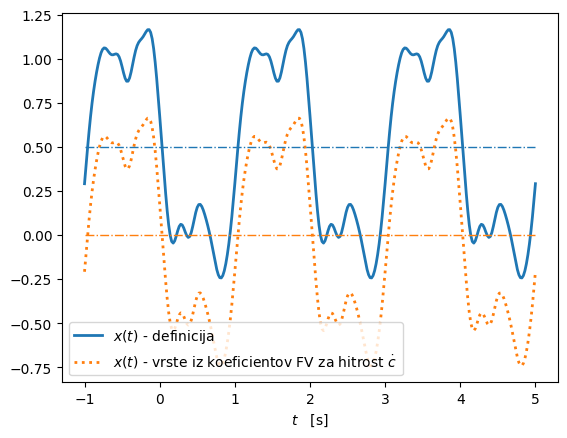

In [17]:
#x_d_t je hitrost, a_0 pa statična komponenta prenešena iz primera zgoraj

N = 10 # identifikacija Fourierovih koeficientov hitrosti
c_d = np.zeros(2*N+1, dtype='complex')
n = np.arange(-N,N+1)
sel = np.logical_and(t>=0, t<=Tp)
for i in n:
    c_d[i+N] = np.trapz(x_d_t[sel]*np.exp(-2j*np.pi*i*t[sel]/Tp), dx=dt)/Tp

x_v = np.zeros(len(t), 'complex') # INTEGRAL Z VRSTAMI
for n in range(-N,N+1):
    if n!=0:
        x_v += c_d[N+n]*np.exp(2j*np.pi*n*t/Tp)/(2j*np.pi*n/Tp)
x_v = np.real(x_v) # teoretično pričakujemo samo realno rezultat (imaginarni del mora biti na nivoju numerične napake)


fig, ax1 = plt.subplots()

ax1.set_xlabel('$t\\quad $[s]')
ax1.plot(t, x, label='$x(t)$ - definicija', c='C0', lw=2, alpha=1) 
ax1.plot(t, x_v, label='$x(t)$ - vrste iz koeficientov FV za hitrost $\\dot{c}$', ls=':', c='C1', lw=2, alpha=1) 
ax1.hlines(a0/2, np.min(t), np.max(t), ls='-.', lw=1)
ax1.hlines(0, np.min(t), np.max(t), ls='-.', color='C1', lw=1)
ax1.legend()
plt.show()

### Periodičen signal

Tukaj si bomo pogledali periodičen signal, ki pa s končnim številom harmonskih komponent ni kompleksno periodičen. Primer takšne funkcije je naraščajoča žaga, prikazana na spodnji sliki. 

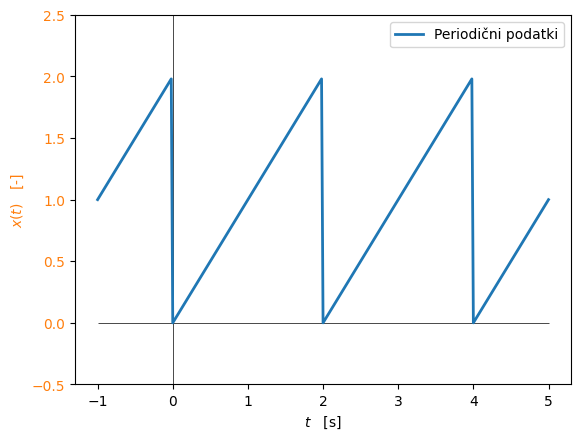

In [19]:
import numpy as np
import matplotlib.pyplot as plt


Tp = 2
t, dt = np.linspace(-0.5*Tp,2.5*Tp,301, retstep=True)
x = t%Tp

fig, ax1 = plt.subplots()

ax1.set_xlabel('$t\\quad $[s]')
ax1.set_ylabel('$x(t)\\quad$[-]', color='C1')
ax1.tick_params(axis='y', labelcolor='C1')
ax1.vlines(0, -0.5, 2.5, 'k', lw=0.5)
ax1.hlines(0, np.min(t), np.max(t), 'k', lw=0.5)
ax1.plot(t, x, label='Periodični podatki', c='C0', lw=2, alpha=1) 
ax1.legend(loc=1)
plt.ylim(-0.5,2.5)
plt.show()

Kljub temu, da signal ni kompleksno periodičen, teorija Fourierovih vrst pa je bila izpeljana ob tej predpostavki, poskusimo identificirati harmonske komponente. Najprej to naredimo na diskretni časovni vrsti.
Osredotočimo se na del podatkov, ki se ponavlja:

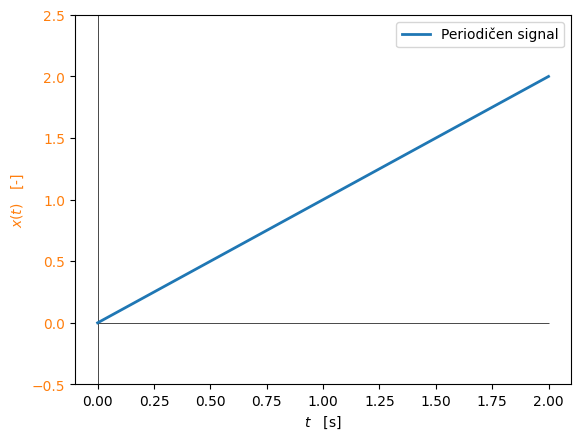

In [21]:
import numpy as np
import matplotlib.pyplot as plt


Tp = 2
t, dt = np.linspace(0,Tp,101, retstep=True)
x = t

fig, ax1 = plt.subplots()

ax1.set_xlabel('$t\\quad $[s]')
ax1.set_ylabel('$x(t)\\quad$[-]', color='C1')
ax1.tick_params(axis='y', labelcolor='C1')
ax1.vlines(0, -0.5, 2.5, 'k', lw=0.5)
ax1.hlines(0, np.min(t), np.max(t), 'k', lw=0.5)
ax1.plot(t, x, label='Periodičen signal', c='C0', lw=2, alpha=1) 
ax1.legend(loc=1)
plt.ylim(-0.5,2.5)
plt.show()

In identificiramo Fourierove koeficiente:

In [22]:
N = 10
c = np.zeros(2*N+1, dtype='complex')
n = np.arange(-N,N+1)
for i in n:
    c[i+N] = np.trapz(x*np.exp(-2j*np.pi*i*t/Tp), dx=dt)/Tp
c

array([-3.85108612e-16-0.03077684j, -3.83373888e-16-0.03442023j,
       -5.03069808e-16-0.03894743j, -2.68882139e-16-0.04473743j,
        1.52655666e-16-0.05242184j, -5.37764278e-17-0.06313752j,
       -4.16333634e-17-0.07915815j, -5.63785130e-17-0.10578895j,
       -6.24500451e-17-0.15894545j, -1.38777878e-17-0.31820516j,
        1.00000000e+00+0.j        , -1.38777878e-17+0.31820516j,
       -6.24500451e-17+0.15894545j, -5.63785130e-17+0.10578895j,
       -4.16333634e-17+0.07915815j, -5.37764278e-17+0.06313752j,
        1.52655666e-16+0.05242184j, -2.68882139e-16+0.04473743j,
       -5.03069808e-16+0.03894743j, -3.83373888e-16+0.03442023j,
       -3.85108612e-16+0.03077684j])

Na podlagi identificiranih Fourierovih koeficientov ne dobimo rezultata, ki je enak podanim podatkom (naraščajoča žaga), pač pa novi signal, ki je kompleksno periodičen:

$$
x(t)=\sum_{n=-N}^{N}
c_n\,\mathrm{e}^{\mathrm{i}\,2\pi\,n\,t/T_p},\qquad c_n=c_{-n}^*.
$$

Konkretna numerična koda je prikazana spodaj (pri tem smo uporabili novo numerično polje `x_r`, da ga ločimo od podatkov v obliki `x`):

In [23]:
x_r = np.zeros(len(t), 'complex')
for n in range(-N,N+1):
    x_r += c[N+n]*np.exp(2j*np.pi*n*t/Tp)
x_r = np.real(x_r) # teoretično pričakujemo samo realno rezultat (imaginarni del mora biti na nivoju numerične napake)


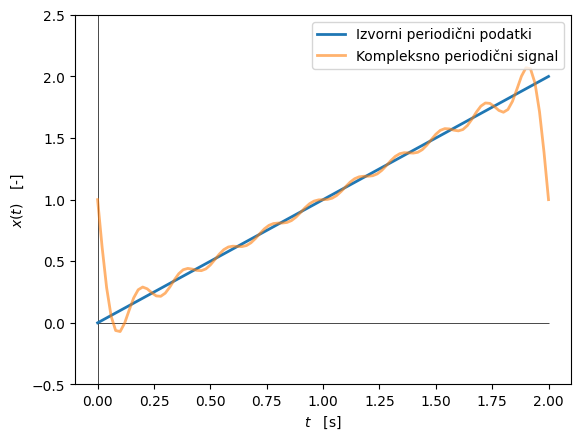

In [25]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('$t\\quad $[s]')
ax1.set_ylabel('$x(t)\\quad$[-]')
ax1.vlines(0, -0.5, 2.5, 'k', lw=0.5)
ax1.hlines(0, np.min(t), np.max(t), 'k', lw=0.5)
ax1.plot(t, x, label='Izvorni periodični podatki', c='C0', lw=2, alpha=1) 
ax1.plot(t, x_r, label='Kompleksno periodični signal', c='C1', lw=2, alpha=.6) 
ax1.legend(loc=1)
plt.ylim(-0.5,2.5)
plt.show()

Opazimo, da identificiran kompleksno harmonski signal relativno dobro opiše izvorni periodični signal. Če bi število harmonskih ($N$) komponent povečali, bi se identificirana funkcija izvornim podatkom bolje prilegala, vendar pa bi na mestu nezveznosti še vedno imeli odstopanje. Odstopanje na mestu nezveznosti je znano pod terminom **Gibbsov** fenomen. Resnici na ljubo je večina inženirskih aplikacij zveznih in zato ponavadi Gibbsov fenomen v praksi nima večjega pomena.

### Analitična obravnava periodičnih signalov

Zgoraj smo Fourierovo vrsto izračunali na diskrenih podatkih in smo zato omejeni, koliko harmonskih komponent lahko izračunamo (`N<len(t)/2`; zakaj je $N$ vezan na dolžino časovne vrste, bomo spoznali pozneje). Tukaj si bomo pogledali obravnavo zveznih sistemov in s pomočjo strojnega izpeljevanja določili Fourierovo vrsto. Kot primer periodičnega signala si bomo izbrali naraščajočo žago, ki bo proporcionalna s časom `t`, perioda bo `Tp`:

In [26]:
import sympy as sym
sym.init_printing()

t, T_p = sym.symbols('t, T_p', real=True)
x_r = sym.fourier_series(t, limits=(t, 0, T_p))

Vrsta sestavljena iz prvih 5 členov torej je:

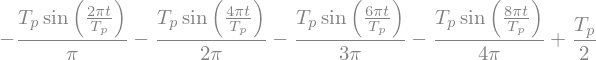

In [27]:
x_r.truncate(5)

Posamezni člen lahko izračunamo tudi sami:

In [28]:
n = 1
c_n = sym.integrate(t*sym.exp(-sym.I*2*n*sym.pi*t/T_p), (t, 0, T_p)).simplify()/T_p
c_n

Da dobimo harmonsko komponento, moramo `c_n` pomnožiti s pripadajočo pozitivno in negativno frekvenco:

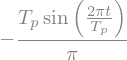

In [29]:
sym.simplify(c_n*sym.exp(sym.I*2*sym.pi*n*t/T_p)+sym.conjugate(c_n)*sym.exp(-sym.I*2*sym.pi*n*t/T_p))

In slika pri `T_p=2` in različnem številu členov v vrsti:

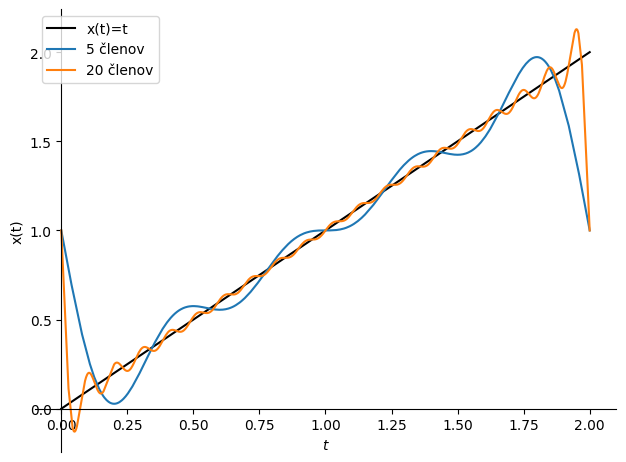

In [30]:
import sympy as sym
sym.init_printing()

t, T_p = sym.symbols('t, T_p')
x_r = sym.fourier_series(t, limits=(t, 0, T_p))

p0 = sym.plot(t, (t, 0 ,2), label='x(t)=t', show=False, line_color='k', ylabel='x(t)', legend=True)
p1 = sym.plot(x_r.truncate(5).subs(T_p,2), (t, 0 ,2), line_color='C0', label='5 členov',  show=False)
p2 = sym.plot(x_r.truncate(20).subs(T_p,2), (t, 0 ,2), line_color='C1', label='20 členov', show=False)
p0.append(p1[0])
p0.append(p2[0])
p0.show()

(sec:dirac_cas)=
## Diracova delta funkcija

Diracova delta funkcija je prikazana na sliki spodaj: ima vrednost nič na celotnem definicijskem področju, razen pri vrednosti $t=0$, ko gre proti neskončnosti; integral Diracove delta funkcije je enak 1.

![dirac-delta](./images/dirac_delta.svg)

:::{note}
Diracova delta funkcija je definirana z:

$$
\delta(t)=0 \quad\textrm{ za } t\ne 0 \qquad\textrm{ in } \qquad \int_{-\infty}^{+\infty}\delta(t)\,\textrm{d}t=1.
$$

:::

Opomba: dejansko to ni navadna funkcije, ampak t.i. generalizirana funkcija.

Ker je integral Diracove delta funkcije 1, se včasih imenuje tudi funkcija enotskega impulza, definirana tudi kot:

$$
\delta_{\varepsilon}=
\begin{cases}
\frac{1}{\varepsilon}&\textrm{ za }\quad -\frac{\varepsilon}{2}\le t\le+\frac{\varepsilon}{2}\\
0& \textrm{sicer}.
\end{cases}.
$$

Pri definiranju enotskega impulza si lahko pomagamo tudi z dvema enotskima funkcijama stopnice. 
**Enotska funkcija stopnice** (ang. unit-step function ali tudi **Heaviside funkcija**) je definirana kot:

$$
u(t)=
\begin{cases}
1&\textrm{ za }\quad t>0\\
0& \textrm{sicer}.
\end{cases}.
$$

Enotski impulz tako definiramo s pomočjo dveh funkcij enotskega koraka:

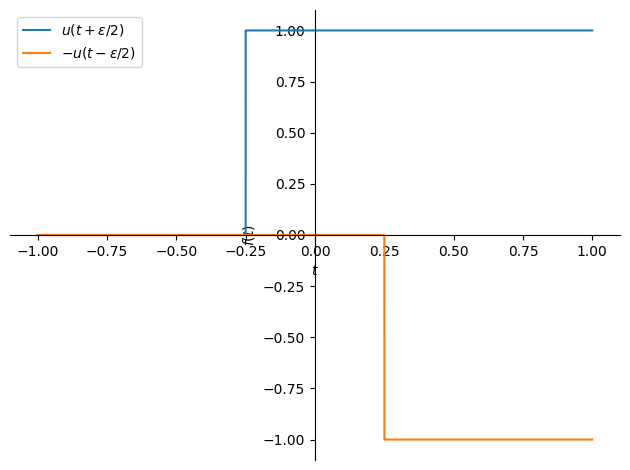

In [31]:
import sympy as sym
t, ε = sym.symbols(r't, \varepsilon')
unit_step = sym.Heaviside(t+ε/2)
p1 = sym.plot(unit_step.subs(ε, +0.5), (t,-1,1), line_color='C0', line_style=':', 
              show=False, label='$u(t+\\varepsilon/2)$') 
p2 = sym.plot(-unit_step.subs(ε, -0.5), (t,-1,1), line_color='C1', 
              show=False, label='$-u(t-\\varepsilon/2)$') 
p1.extend(p2)
p1.legend = True
p1.show()

Do enotskega impulza pridemo z uteženim seštevanjem:

$$
\delta_{\varepsilon}=\frac{1}{\varepsilon}\Big(u\big(t+\frac{\varepsilon}{2}\big)-u\big(t-\frac{\varepsilon}{2}\big)\Big)
$$

Poglejmo si, kako koračno funkcijo pretvorimo v enotski impulz:

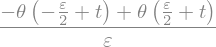

In [32]:
import sympy as sym
t, ε = sym.symbols(r't, \varepsilon')
podatki = {ε: 0.5}
unit_step = sym.Heaviside(t+ε/2) # tukaj moramo pravilno normirati (H0), glej help!
δ_ε = 1/ε * (unit_step-unit_step.subs(ε, -ε))
δ_ε

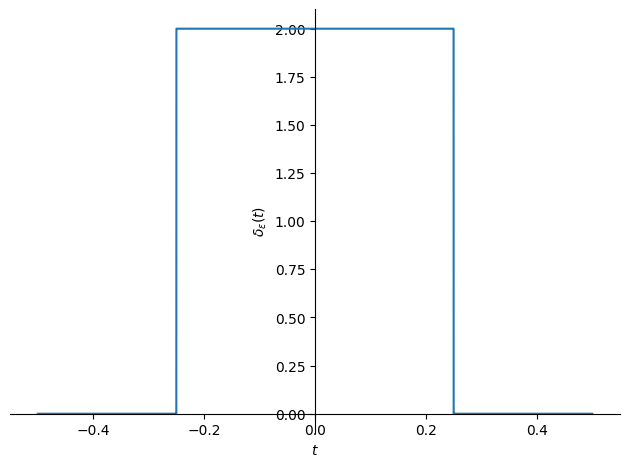

In [33]:
p1 = sym.plot(δ_ε.subs(podatki), (t,-.5,.5), line_color='C0', line_style=':', 
              ylabel='$\\delta_{\\varepsilon}(t)$')

in nato integriramo (rezultat je pričakovano enak 1; spremenite $\varepsilon$ v `podatki` zgoraj!):

In [34]:
sym.integrate(δ_ε.subs(podatki), (t, -sym.oo, sym.oo))

Med Diracovo delta funkcijo in enotskim korakom velja tudi sledeča povezava ($u(t)$ je koračna funkcija):

$$
\delta(t)=\lim_{\varepsilon\rightarrow 0}\delta_{\varepsilon}(t)=\frac{\textrm{d}}{\textrm{d}t}u(t).
$$

(sec:dirac_lastnosti)=
### Lastnosti Diracove delta funkcije

:::{note}

1. je soda: $\delta(t)=\delta(-t)$

1. *sejalna lastnost*, to pomeni, da integral navadne funkcije $x(t)$ in premaknjene Diracove funkcije $\delta(t-a)$ vrne vrednost funkcije $x(a)$:$\int_{-\infty}^{+\infty}x(t)\,\delta(t-a)\,\textrm{d}t= x(a)$.

1. $\int_{-\infty}^{+\infty}\mathrm{e}^{\pm\textrm{i}\,2\,\pi\,a\,t}\,\textrm{d}t= \delta(a)$ ali tudi: $\int_{-\infty}^{+\infty}\mathrm{e}^{\pm\textrm{i}\,a\,t}\,\textrm{d}t= 2\,\pi\,\delta(a)$, za dokaz glejte {cite:t}`bendat_2011,shin2008` (str. 40).

1. $\delta(a\,t)=\delta(t)/|a|$.

1. $\int_{-\infty}^{+\infty}f(t)\,\delta^{(n)}(t-a)\,\textrm{d}t= (-1)^n\,f^{(n)}(a)$, kjer $n$ označuje odvod.

:::

### Padajoča žaga in njen odvod

Predpostavimo periodični signal oblike padajoče žage, kot je prikazana spodaj:

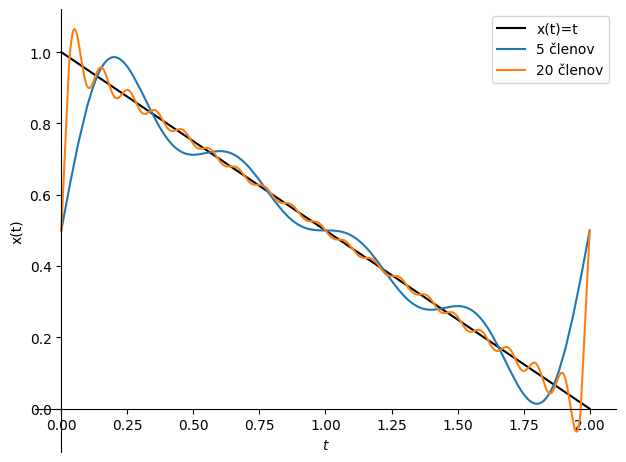

In [35]:
import sympy as sym
sym.init_printing()

t, T_p = sym.symbols('t, T_p')
podatki = {T_p: 2}
x = 1-t/T_p
x_r = sym.fourier_series(x, limits=(t, 0, T_p))

p0 = sym.plot((x).subs(podatki), (t, 0 ,2), label='x(t)=t', show=False, line_color='k', ylabel='x(t)', legend=True)
p1 = sym.plot(x_r.truncate(5).subs(podatki), (t, 0 ,2), line_color='C0', label='5 členov',  show=False)
p2 = sym.plot(x_r.truncate(20).subs(podatki), (t, 0 ,2), line_color='C1', label='20 členov', show=False)
p0.append(p1[0])
p0.append(p2[0])
p0.show()

Fourierova vrsta padajočega žagastega signala je definirana kot:

$$
x(t) = \frac{1}{2}+\frac{1}{\pi}\sum_{n=1}^{\infty}\frac{1}{n}\sin\Big(\frac{2\pi\,n\,t}{T_p}\Big)
$$

Ali s pomočjo strojnega izpeljevanja:

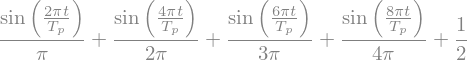

In [36]:
import sympy as sym
sym.init_printing()

t, T_p = sym.symbols('t, T_p')
podatki = {T_p: 2}
x = 1-t/T_p
x_r = sym.fourier_series(x, limits=(t, 0, T_p))

x_r.truncate(5)

Če odvajamo padajočo žagasto funkcijo v času, je rezultat enak:

$$
\dot x(t) = -\frac{1}{T_p} + \sum_{n=-\infty}^{+\infty}\delta(t-n\,T_p)
$$

ker pa lahko odvajamo tudi vrsto, velja tudi:

$$
\dot x(t) = \frac{2}{T_p}\sum_{n=1}^{\infty}\cos\Big(\frac{2\pi\,n\,t}{T_p}\Big).
$$

S pomočjo zadnjih dveh enačb, lahko izpeljemo izraz za vlak impulzov:

:::{note}

Periodični *vlak impulzov* (ang. *train of impulses*) ima v obliki Fourierovih vrst konstantne koeficiente ($2/T_p$):

$$
\sum_{n=-\infty}^{+\infty}\delta(t-n\,T_p) =  \frac{1}{T_p} +\frac{2}{T_p}\sum_{n=1}^{\infty}\cos\Big(\frac{2\pi\,n\,t}{T_p}\Big)
$$

:::

Slednjo ugotovitev bomo pozneje potrebovali, ko bomo obravnavali vzorčenje signalov.

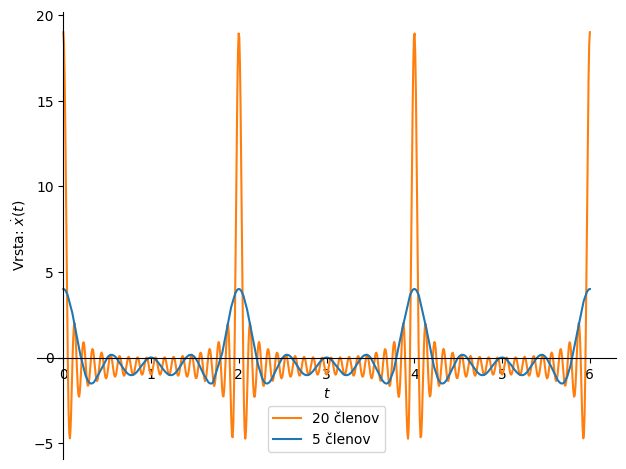

In [37]:
import sympy as sym
sym.init_printing()

t, T_p = sym.symbols('t, T_p')
podatki = {T_p: 2}
x = 1-t/T_p
x_r = sym.fourier_series(x, limits=(t, 0, T_p))

p0 = sym.plot(sym.diff(x_r.truncate(20),t).subs(podatki), (t, 0 ,6), line_color='C1', label='20 členov', show=False, 
              ylabel='Vrsta: $\\dot x(t)$', legend=True, adaptive=False, nb_of_points=800)
p1 = sym.plot(sym.diff(x_r.truncate(5),t).subs(podatki), (t, 0 ,6), line_color='C0', label='5 členov',  show=False)
p0.append(p1[0])
p0.show()

## Amplitudni in fazni spekter

Fourierovi koeficienti $c_n$, ki jih obravnavamo pri Fourierovih vrstah, predstavljajo amplitudno in fazno informacijo o določeni harmonski komponenti. Poglejmo si primer periodičnega pravokotnega vala: slika spodaj. 

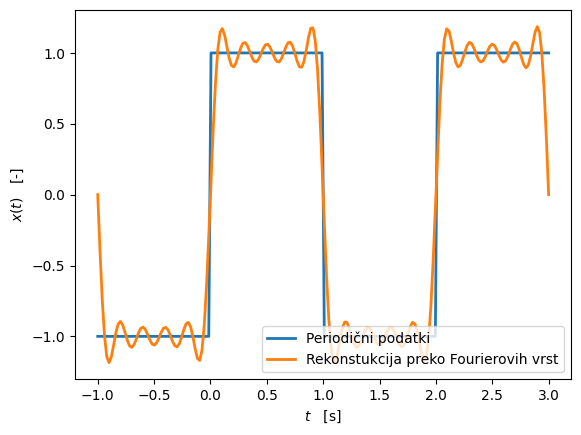

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# signal
T_p = 2
n = 200
x = np.ones(n)
x[:n//4] = -1.
x[n//4:2*n//4] = 1.
x[2*n//4:3*n//4] = -1.
x[3*n//4:n] = 1.

t = np.arange(n)*2*T_p/(n-1) - T_p/2
dt = t[1]-t[0]

# zakaj je ta koda napačna?
# t, dt = np.linspace(-0.5*Tp,1.5*Tp,201, retstep=True)
# x = np.sign(np.sin(2*np.pi*t/Tp))

# Fourierove vrste
N = 10
c = np.zeros(2*N+1, dtype='complex')
n = np.arange(-N,N+1)
#omejiti se moramo samo na eno periodo, sicer koeficienti niso pravilno izračunani
sel = np.logical_and(t>=0,t<=T_p) 
for i in n:
    c[i+N] = np.trapz(x[sel]*np.exp(-2j*np.pi*i*t[sel]/T_p), dx=dt)/T_p

# rekonstrukcija
x_r = np.zeros(len(t), 'complex')
for _ in range(-N,N+1):
    x_r += c[N+_]*np.exp(2j*np.pi*_*t/T_p)
x_r = np.real(x_r) 

fig, ax1 = plt.subplots()

ax1.set_xlabel('$t\\quad $[s]')
ax1.set_ylabel('$x(t)\\quad$[-]')
ax1.tick_params(axis='y')
ax1.plot(t, x, label='Periodični podatki', c='C0', lw=2, alpha=1) 
ax1.plot(t, x_r, label='Rekonstukcija preko Fourierovih vrst', c='C1', lw=2, alpha=1) 
ax1.legend(loc=4)
plt.show()

Pri pripravi podatkov zgoraj smo izračunali Fourierove koeficiente $c$:

In [40]:
c

array([-2.77555756e-17-1.98252732e-03j, -3.12250226e-17+6.99121564e-02j,
       -1.70002901e-16-1.58622479e-03j,  3.08780779e-16+9.03023227e-02j,
        1.17961196e-16-1.18979483e-03j,  4.51028104e-17+1.26862832e-01j,
       -3.81639165e-17-7.93259458e-04j,  6.59194921e-17+2.11929286e-01j,
       -6.93889390e-18-3.96649155e-04j,  6.24500451e-17+6.36527232e-01j,
        0.00000000e+00+0.00000000e+00j,  6.24500451e-17-6.36527232e-01j,
       -6.93889390e-18+3.96649155e-04j,  6.59194921e-17-2.11929286e-01j,
       -3.81639165e-17+7.93259458e-04j,  4.51028104e-17-1.26862832e-01j,
        1.17961196e-16+1.18979483e-03j,  3.08780779e-16-9.03023227e-02j,
       -1.70002901e-16+1.58622479e-03j, -3.12250226e-17-6.99121564e-02j,
       -2.77555756e-17+1.98252732e-03j])

Fourierove koeficiente lahko prikažemo v grafični obliki. Če prikažemo amplitudo kompleksnega števila $|c|$, potem govorimo o amplitudnem spektru: za določeni večkratnih osnovne frekvence $1/T_p$ prikažemo vsebnost amplitude harmonske komponente. Podobno govorimo o faznem spektru, če prikažemo $\angle c_n$.

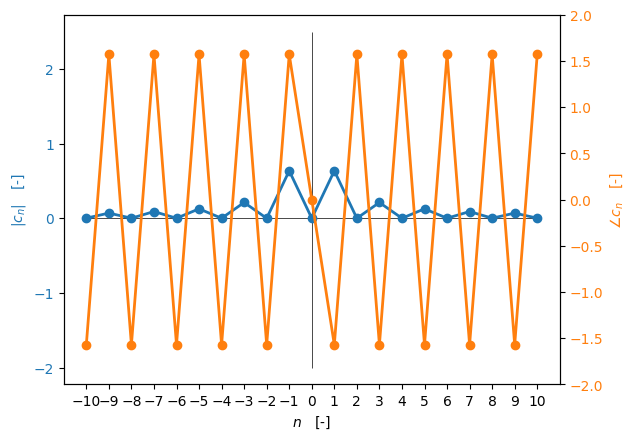

In [42]:
import numpy as np
import matplotlib.pyplot as plt


fig, ax1 = plt.subplots()

ax1.set_xlabel('$n\\quad $[-]')
ax1.set_ylabel('$|c_n|\\quad$[-]', color='C0')
ax1.tick_params(axis='y', labelcolor='C0')
ax1.vlines(0, -2, 2.5, 'k', lw=0.5)
ax1.hlines(0, np.min(n), np.max(n), 'k', lw=0.5)
ax1.plot(n, np.abs(c), 'o-', label='Amplituda $c_n$', c='C0', lw=2, alpha=1) 
ax1.set_xticks(ticks=n)

ax2 = ax1.twinx() 
ax2.plot(n, np.angle(c), 'o-', label='Faza $c_n$', c='C1', lw=2, alpha=1) 
ax2.set_ylabel('$\\angle c_n \\quad$[-]', color='C1')
ax2.tick_params(axis='y', labelcolor='C1')

ax2.set_ylim(-2.,2.)
plt.show()

(sec:parseval)=
## Parsevalov teorem in močnostni spekter

### Parsevalov teorem

Če je $x(t)$ napetost, merjena čez upor upornosti $1\Omega$, potem je trenutna moč enaka $P(t)=R\,x^2(t)$, povprečna moč periodičnega signala znotraj ene periode pa je:

$$
\frac{1}{T_p}\int_0^{T_p}x^2(t)\,\textrm{d}t
$$

ker velja $x(t)=\sum_{n=-\infty}^{\infty}c_n\,\mathrm{e}^{\mathrm{i}\,2\pi\,n\,t/T_p}$ in $x^2(t)=x(t)\,x^*(t)$, je povprečna moč definirana tudi kot:

$$
\frac{1}{T_p}\int_0^{T_p}x^2(t)\,\textrm{d}t=
\frac{1}{T_p}\int_0^{T_p}\sum_{n=-\infty}^{\infty}c_n\,\mathrm{e}^{\mathrm{i}\,2\pi\,n\,t/T_p}\,\sum_{m=-\infty}^{\infty}c_m^*\,\mathrm{e}^{-\mathrm{i}\,2\pi\,m\,t/T_p}\,\textrm{d}t
$$

kar poenostavimo v:

$$
\frac{1}{T_p}\int_0^{T_p}x^2(t)\,\textrm{d}t=
\frac{1}{T_p}\sum_{n=-\infty}^{\infty}\,\sum_{m=-\infty}^{\infty}c_n\,c_m^*\,\int_0^{T_p}\mathrm{e}^{\mathrm{i}\,2\pi\,(n-m)\,t/T_p}\,\textrm{d}t
$$


Integral harmonskega signala na zaključeni periodi je vedno nič razen, ko je frekvenca 0. Ko je frekvenca enaka 0, je podintegralska funkcija enaka 1 in integral $T_p$:

$$
\int_0^{T_p}\mathrm{e}^{\mathrm{i}\,2\pi\,(n-m)\,t/T_p}\,\textrm{d}t=
\begin{cases}
T_p,&\textrm{če}\quad m=n,\\
0,&\textrm{sicer.}\\
\end{cases}
$$

:::{note}

Sledi **Parsevalov teorem** ali tudi Parsevalova enakost:

$$
\frac{1}{T_p}\int_0^{T_p}x^2(t)\,\textrm{d}t=
\sum_{n=-\infty}^{\infty}c_n\,c_n^*,
$$

ki poveže povprečno moč v času z močjo v frekvenčni domeni.

:::

Poglejmo si konkreten zgled:

In [43]:
T_p = 2
t, dt = np.linspace(0,T_p,101, retstep=True)
a0 = 1.
N = 10
seed = 0
rg = np.random.default_rng(seed)
a = rg.normal(size=N)*1/np.arange(1,N+1)**2 #skaliranje na koncu, da imajo višje komponente imajo manjšo amplitudo
b = rg.normal(size=N)*1/np.arange(1,N+1)**2

c = np.zeros(2*N+1, dtype='complex')
c[N+1:] = 0.5*a-0.5j*b
c[N] = a0/2
c[:N] = np.conj(c[N+1:])[::-1]

x = np.zeros(len(t), 'complex')
for n in range(-N,N+1):
    x += c[N+n]*np.exp(2j*np.pi*n*t/T_p)
x = np.real(x) # teoretično pričakujemo samo realno rezultat (imaginarni del mora biti na nivoju numerične napake)

Vrednost iz časa:

In [44]:
np.trapz(x**2,dx=dt)/T_p

Vrednost na podlagi Fourierovih koeficientov:

In [45]:
np.dot(c,np.conjugate(c))

(0.4912052334566629+0j)

Po pričakovanjih dobimo enako vrednost (do nivoja numerične napake)!

### Močnostni spekter

Parsevalov teorem povprečno moč definira kot vsoto kvadratov Fourierovih koeficientov oz. frekvenčnih komponent. Prikaz kvadratov posameznih frekvenčnih komponent imenujemo močnostni spekter. Pri tem je treba poudariti, da močnostni spekter izgubi informacijo o fazi in je vedno definiran z realnimi vrednostmi.

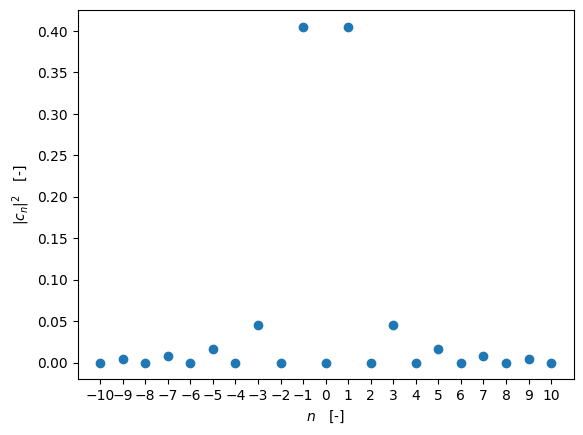

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# signal
T_p = 2
t, dt = np.linspace(-0.5*T_p,1.5*T_p,201, retstep=True)
x = np.sign(np.sin(2*np.pi*t/T_p))

# Fourierove vrste
N = 10
c = np.zeros(2*N+1, dtype='complex')
n = np.arange(-N,N+1)
#omejiti se moramo samo na eno periodo, sicer koeficienti niso pravilno izračunani
sel = np.logical_and(t>=0,t<=T_p) 
for i in n:
    c[i+N] = np.trapz(x[sel]*np.exp(-2j*np.pi*i*t[sel]/T_p), dx=dt)/T_p

    
fig, ax1 = plt.subplots()

ax1.set_xlabel('$n\\quad $[-]')
ax1.set_ylabel('$|c_n|^2\\quad$[-]')
ax1.plot(n, np.real(c*np.conjugate(c)), 'o', label='Amplituda $c_n$', c='C0', lw=2, alpha=1) 
ax1.set_xticks(ticks=n)
plt.show()